In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading data

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X = df.iloc[:,2:4]
y = df['Purchased']
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


# Try a few ML algorithms

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train)
print(dtree.score(X_test, y_test))
print(dtree.feature_importances_)

0.93
[0.51743843 0.48256157]


In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score
tree_predict = dtree.predict(X_test)
print('Precision:', precision_score(y_test, tree_predict))
print('Recall:', recall_score(y_test, tree_predict))
print('F1 score:', f1_score(y_test, tree_predict))

Precision: 0.9032258064516129
Recall: 0.875
F1 score: 0.8888888888888888


In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, tree_predict)

array([[65,  3],
       [ 4, 28]], dtype=int64)

In [10]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
print(svc.score(X_test, y_test))
svc_predict = svc.predict(X_test)
confusion_matrix(y_test, svc_predict)

0.89


array([[67,  1],
       [10, 22]], dtype=int64)

In [11]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', C = 1, gamma = 200).fit(X_train, y_train)
print(svc.score(X_test, y_test))
svc_predict = svc.predict(X_test)
confusion_matrix(y_test, svc_predict)

0.93


array([[64,  4],
       [ 3, 29]], dtype=int64)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
print(knn.score(X_test, y_test))
knn_predict = knn.predict(X_test)
confusion_matrix(y_test, knn_predict)

0.93


array([[64,  4],
       [ 3, 29]], dtype=int64)

In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C = 100).fit(X_train, y_train)
print(logreg.score(X_test, y_test))
logreg_predict = logreg.predict(X_test)
confusion_matrix(y_test, logreg_predict)

0.89


array([[65,  3],
       [ 8, 24]], dtype=int64)

# Regression

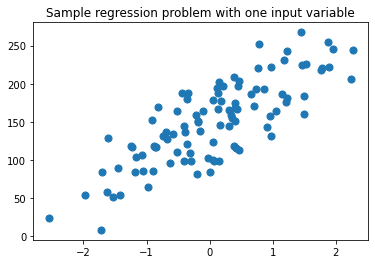

In [14]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


R^2 score: 0.6312831008580885


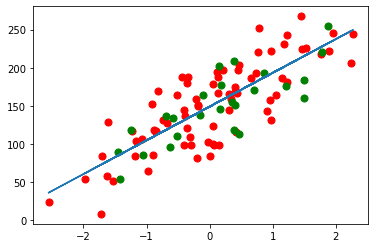

In [15]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 1)
lr = LinearRegression().fit(X_train, y_train)
print('R^2 score:', lr.score(X_test, y_test))
plt.figure()
plt.scatter(X_train, y_train, marker= 'o', color = 'red', s=50)
plt.scatter(X_test, y_test, marker= 'o', color = 'green', s=50)
plt.plot(X_train, lr.coef_ * X_train + lr.intercept_)
plt.show()

In [16]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 15).fit(X_train_scaled, y_train)
predict_knr = knr.predict(X_test_scaled)
print('Actual\t\t\tPredicted')
for actual, predicted in zip(y_test, predict_knr):
    print(actual, '\t', predicted)
    
print('R^2:', knr.score(X_test_scaled, y_test))

Actual			Predicted
193.30736175646567 	 194.21988572066482
163.7621851609947 	 132.2944752401349
209.37368061142905 	 168.2895716263535
171.06544836428418 	 179.7234283236833
145.7043267157145 	 144.53221792724966
220.18993612124314 	 214.19912962064544
201.83216386786148 	 144.53221792724966
137.3107897917961 	 128.15760806860186
254.28898121437092 	 214.19912962064544
89.85292906428701 	 88.5087663443148
95.26916228102651 	 136.69301379310997
118.32635079464788 	 103.55715621519974
117.76643280760565 	 168.28957162635353
112.71980976306843 	 176.06590335596863
54.40609235957442 	 88.5087663443148
85.72342625309093 	 113.79518757663935
133.31521902996107 	 139.33701539240408
177.05657698931608 	 144.53221792724966
160.2191540356373 	 204.2167578998639
110.89907644857612 	 139.8244326578859
150.56377655943407 	 168.28957162635353
184.40539504505026 	 204.2167578998639
155.14385776391484 	 162.41049742788877
176.4168480793286 	 203.002005158266
136.6077507504043 	 132.9104946989033
R^2:

# Polynomial features

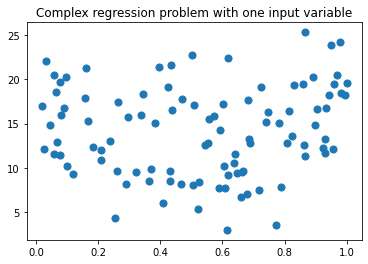

In [18]:
# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree = 4)
X_F1_poly = poly2.fit_transform(X_F1)
X_F1_train, X_F1_test, y_F1_train, y_F1_test = train_test_split(X_F1_poly, y_F1)
scaler = MinMaxScaler()

X_F1_train = scaler.fit_transform(X_F1_train)
X_F1_test = scaler.transform(X_F1_test)

lr2 = LinearRegression().fit(X_F1_train, y_F1_train)
print(lr2.score(X_F1_test, y_F1_test))

0.8855172182450959


In [20]:
# Polynomial features and ridge regression
from sklearn.linear_model import Ridge
poly4 = PolynomialFeatures(degree = 4)
X_F1_poly = poly4.fit_transform(X_F1)
X_F1_train, X_F1_test, y_F1_train, y_F1_test = train_test_split(X_F1_poly, y_F1)
scaler = MinMaxScaler()

X_F1_train = scaler.fit_transform(X_F1_train)
X_F1_test = scaler.transform(X_F1_test)

lr4 = Ridge(alpha = 0.5).fit(X_F1_train, y_F1_train)
print(lr4.score(X_F1_test, y_F1_test))

0.82296624201055


# Validation curve

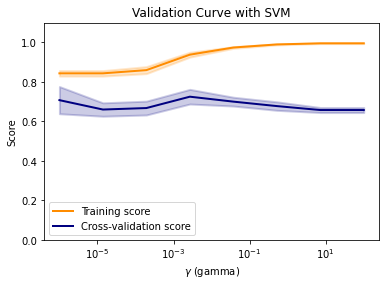

In [21]:
from sklearn.model_selection import validation_curve
X = df.iloc[:,2:4]
y = df['Purchased']

param_range = np.logspace(-6, 2, 8)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()


In [22]:
train_scores

array([[0.83125 , 0.821875, 0.85625 , 0.853125, 0.853125],
       [0.83125 , 0.821875, 0.85625 , 0.853125, 0.853125],
       [0.840625, 0.8375  , 0.86875 , 0.884375, 0.865625],
       [0.928125, 0.91875 , 0.94375 , 0.953125, 0.94375 ],
       [0.971875, 0.971875, 0.96875 , 0.98125 , 0.975   ],
       [0.9875  , 0.9875  , 0.9875  , 0.99375 , 0.990625],
       [0.996875, 0.996875, 0.99375 , 0.99375 , 0.99375 ],
       [0.996875, 0.996875, 0.99375 , 0.99375 , 0.99375 ]])

In [23]:
test_scores

array([[0.775 , 0.8   , 0.625 , 0.6875, 0.65  ],
       [0.6875, 0.7125, 0.6375, 0.625 , 0.6375],
       [0.675 , 0.725 , 0.675 , 0.625 , 0.6375],
       [0.7625, 0.7625, 0.7125, 0.6625, 0.725 ],
       [0.725 , 0.725 , 0.7   , 0.675 , 0.675 ],
       [0.6875, 0.675 , 0.7   , 0.6375, 0.6875],
       [0.675 , 0.65  , 0.6625, 0.6375, 0.6625],
       [0.675 , 0.65  , 0.6625, 0.6375, 0.6625]])